# 1 Introduction to Time Series

Time series analysis aims to utilize such data for several purposes that can be
broadly categorized as:
- To understand and interpret the underlying forces that produce the observed state of a system or process over time
- To forecast the future state of the system or process in terms of observable characteristics

However, before taking a deep dive into these techniques, this chapter aims to explain the
following two aspects:
- Difference between time series and non-time series data
- Internal structures of time series (trends, seasonal fluctuations, cyclical behavior, and irregular changes)

This chapter will cover the following points:
- Knowing the different types of data you might come across in your analytics projects
- Understanding the internal structures of data that makes a time series
- Dealing with auto-correlation, which is the single most important internal structure of a time series and is often the primary focus of time series analysis


## Different types of data
- Cross-sectional data
- Time series data
- Panel data


In [151]:
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


In [152]:
os.chdir('/home/ishta/Analyzing-and-predicting-the-volatile-market-patterns-for-trading/Notebooks_time_series')

In [153]:
data = pd.read_csv('Datasets/eurusd_minute.csv')

In [154]:
print('Column names:', data.columns)

Column names: Index(['Date', 'Time', 'BO', 'BH', 'BL', 'BC', 'BCh', 'AO', 'AH', 'AL', 'AC',
       'ACh'],
      dtype='object')


Date - Date

Time - Time in which the price was measured.

BO - Opening bid price.

BH - Highest bid price in that one minute period.

BL - Lowest bid price in that one minute period.

BC - Closing bid price.

BCh - Change between open and close price.

AO - Opening ask price.

AH - Highest ask price in that one minute period.

AL - Lowest ask price in that one minute period.

AC - Closing ask price.

ACh - Change between open and close ask price.

In [155]:
print('No. of rows, columns:', data.shape)

No. of rows, columns: (5618819, 12)


In [156]:
nb_days = data['Date'].unique().shape[0]
print('Unique number of days:', nb_days)

Unique number of days: 4775


# Cross-sectional data
value wise analysis

we are now set to extract the rows and columns that are relevant for our visualization

In [157]:
chosen_date_1 = data.loc[data['Date']=='2005-06-02']
print('Shape of chosen date 1:', chosen_date_1.shape)

Shape of chosen date 1: (1439, 12)


In [158]:
chosen_date_2 = data.loc[data['Date']=='2005-06-03']
print('Shape of chosen date 2:', chosen_date_2.shape)

Shape of chosen date 2: (1255, 12)


In [159]:
chosen_date_1['BC'].describe()

count    1439.000000
mean        1.225373
std         0.002803
min         1.218300
25%         1.222500
50%         1.226600
75%         1.227350
max         1.229200
Name: BC, dtype: float64

In [160]:
chosen_date_2['BC'].describe()

count    1255.000000
mean        1.226510
std         0.002847
min         1.220530
25%         1.223130
50%         1.227830
75%         1.228500
max         1.232400
Name: BC, dtype: float64

In [161]:
chosen_date_1.index = chosen_date_1['Time']
chosen_date_1_BC = chosen_date_1['BC'].loc[~pd.isnull(chosen_date_1['BC'])]

In [162]:
chosen_date_2.index = chosen_date_2['Time']
chosen_date_2_BC = chosen_date_2['BC'].loc[~pd.isnull(chosen_date_2['BC'])]

In [163]:
data_to_plot = pd.concat((chosen_date_1_BC, chosen_date_2_BC), axis=1)
data_to_plot.columns = ['chosen_date_1_BC', 'chosen_date_2_BC']

In [164]:
data_to_plot.head(10)

,chosen_date_1_BC,chosen_date_2_BC
Time,,
0:0,1.2197,1.2273
0:1,1.2198,1.2273
0:2,1.2200,1.2271
0:3,1.2202,1.2270
0:4,1.2202,1.2271
0:5,1.2204,1.2270
0:6,1.2205,1.2270
0:7,1.2206,1.2270
0:8,1.2209,1.2271


### Count values are different.To plot, we have to take only those times that have both day 1 and and day 2 values. Run the following line, to filter out rows with missing values:

In [165]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.chosen_date_1_BC)) & (~pd.isnull(data_to_plot.chosen_date_2_BC)), :]

In [166]:
data_to_plot.head(10)

,chosen_date_1_BC,chosen_date_2_BC
Time,,
0:0,1.2197,1.2273
0:1,1.2198,1.2273
0:2,1.2200,1.2271
0:3,1.2202,1.2270
0:4,1.2202,1.2271
0:5,1.2204,1.2270
0:6,1.2205,1.2270
0:7,1.2206,1.2270
0:8,1.2209,1.2271


### The above table has only non-empty values and we are now ready to generate the plots for the cross-sectional data. The following lines of code generate the plot on the univariate cross-sectional data



## Univariate kernal density plot

/tmp/ipykernel_10890/1001654002.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(np.array(data_to_plot.chosen_date_1_BC), norm_hist=False)


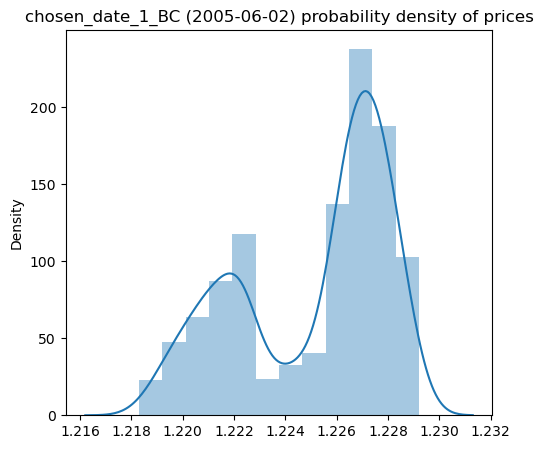

In [167]:
plt.figure(figsize=(5.5, 5.0))
g = sns.distplot(np.array(data_to_plot.chosen_date_1_BC), norm_hist=False)
g.set_title('chosen_date_1_BC (2005-06-02) probability density of prices')
plt.savefig('plots/ch1/B07887_01_01.png', format='png', dpi=300)





## Bivariate kernel density plot

### We will also generate the bivariate plot

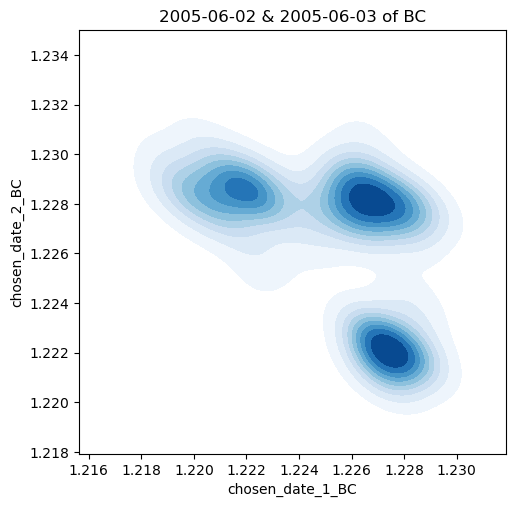

In [168]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data=data_to_plot,x="chosen_date_1_BC",y="chosen_date_2_BC",fill=True,cmap="Blues",)
g.set_title('2005-06-02 & 2005-06-03 of BC')
plt.savefig('plots/ch1/B07887_01_02.png', format='png', dpi=300)

# Time series data

### A time series is made up of quantitative observations on one or more measurable characteristics of an individual entity and taken at multiple points in time.Time series data is typically characterized by several interesting internal structures such as trend, seasonality, stationarity, autocorrelation, and so on. These will be conceptually discussed in the coming sections in this chapter.

### The internal structures of time series data require special formulation and techniques for its analysis. These techniques will be covered in the following chapters with case studies and implementation of working code in Python. 

In [169]:
data_to_plot.head(10)

,chosen_date_1_BC,chosen_date_2_BC
Time,,
0:0,1.2197,1.2273
0:1,1.2198,1.2273
0:2,1.2200,1.2271
0:3,1.2202,1.2270
0:4,1.2202,1.2271
0:5,1.2204,1.2270
0:6,1.2205,1.2270
0:7,1.2206,1.2270
0:8,1.2209,1.2271


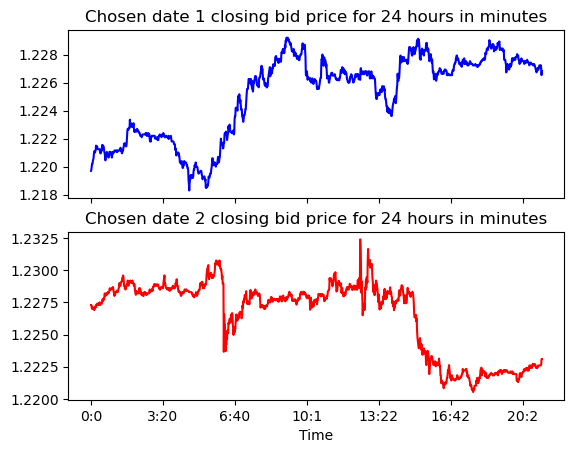

In [170]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
#f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Chosen date 1 closing bid price for 24 hours in minutes')
data_to_plot['chosen_date_1_BC'].plot(linestyle='-', color='b', ax=axarr[0])
axarr[1].set_title('Chosen date 2 closing bid price for 24 hours in minutes')
data_to_plot['chosen_date_2_BC'].plot(linestyle='-', color='r', ax=axarr[1])
plt.savefig('plots/ch1/B07887_01_03.png', format='png', dpi=300)

# Panel data

### So far, we have seen data taken from multiple individuals but at one point in time (cross- sectional) or taken from an individual entity but over multiple points in time (time series). However, if we observe multiple entities over multiple points in time we get a panel data also known as longitudinal data.

In [203]:
# Assuming 'Date' and 'Time' columns are in datetime format
if 'Date' in data.columns and 'Time' in data.columns:
    data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('DateTime', inplace=True)

# Define the time range
start_time = '2005-01-02 18:30:00'
end_time = '2005-01-03 02:50:00'

# Extract rows within the specified time range
selected_rows = data.loc[start_time:end_time].copy()  # Ensure you have a copy

# Drop rows with empty points (NaN values)
selected_rows.dropna(inplace=True)

# Reset the index if needed
selected_rows.reset_index(inplace=True)

# Drop the 'Date' and 'Time' columns from the original DataFrame
data.drop(['Date', 'Time'], axis=1, inplace=True, errors='ignore')


In [204]:
print('Column names:', selected_rows.columns)

Column names: Index(['DateTime', 'BO', 'BH', 'BL', 'BC', 'BCh', 'AO', 'AH', 'AL', 'AC',
       'ACh'],
      dtype='object')


In [205]:
selected_rows

,DateTime,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-01-02 18:38:00,1.3555,1.3555,1.3555,1.3555,0.0000,1.3565,1.3565,1.3565,1.3565,0.0000
1,2005-01-02 18:51:00,1.3562,1.3562,1.3562,1.3562,0.0000,1.3572,1.3572,1.3572,1.3572,0.0000
2,2005-01-02 18:52:00,1.3560,1.3560,1.3560,1.3560,0.0000,1.3570,1.3570,1.3570,1.3570,0.0000
3,2005-01-02 18:55:00,1.3563,1.3563,1.3563,1.3563,0.0000,1.3573,1.3573,1.3573,1.3573,0.0000
4,2005-01-02 18:57:00,1.3562,1.3562,1.3562,1.3562,0.0000,1.3572,1.3572,1.3572,1.3572,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
366,2005-01-03 02:46:00,1.3520,1.3521,1.3519,1.3519,0.0001,1.3523,1.3524,1.3522,1.3522,0.0001
367,2005-01-03 02:47:00,1.3519,1.3520,1.3517,1.3520,-0.0001,1.3522,1.3523,1.3520,1.3523,-0.0001
368,2005-01-03 02:48:00,1.3520,1.3520,1.3519,1.3519,0.0001,1.3523,1.3523,1.3522,1.3522,0.0001
369,2005-01-03 02:49:00,1.3520,1.3520,1.3519,1.3520,0.0000,1.3523,1.3523,1.3522,1.3523,0.0000


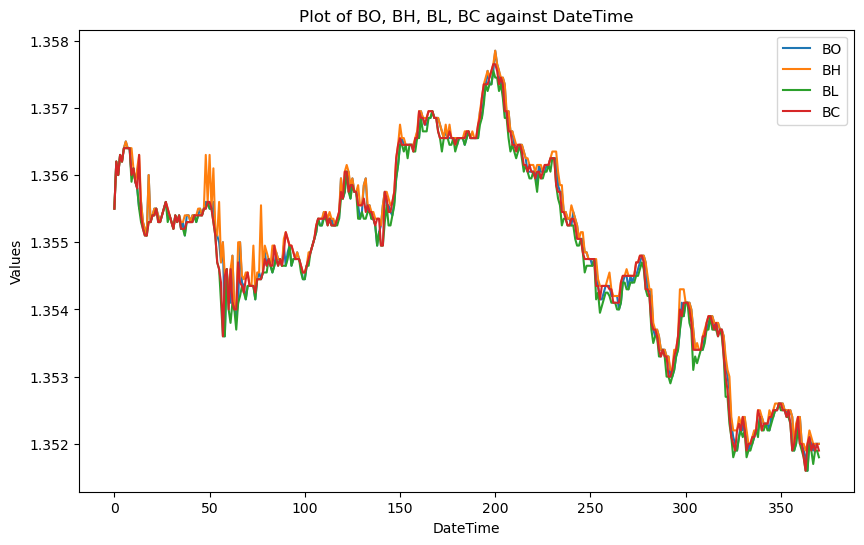

In [214]:
# Assuming 'DateTime' is the index column
plt.figure(figsize=(10, 6))

# Plot each column against 'DateTime'
for column in ['BO', 'BH', 'BL', 'BC']:
    plt.plot(selected_rows.index, selected_rows[column], label=column)


# Set labels and title
plt.xlabel('DateTime')
plt.ylabel('Values')
plt.title('Plot of BO, BH, BL, BC against DateTime')

# Show legend
plt.legend()

plt.savefig('plots/ch1/B07887_01_04.png', format='png', dpi=300)
